# visualise block2vec embeddings, etc.

In [158]:
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme()

# %matplotlib ipympl
%matplotlib inline

In [2]:
LIST_OUTPUT_DIR = 'output/block2vec/block2vec 64 dim'

## block frequency histogram

In [3]:
with open(LIST_OUTPUT_DIR + '/block_frequency.pkl', 'rb') as f:
    block_frequency = pickle.load(f)

block_frequency_dict = dict(block_frequency)

keys = list(block_frequency_dict.keys())
vals = [block_frequency_dict[k] for k in keys]

block_frequency_df = pd.DataFrame({'block id': keys, 'frequency': vals})
block_frequency_df = block_frequency_df.sort_values('frequency', ascending=False)
block_frequency_df

,block id,frequency
0,minecraft:air,63609606
1,minecraft:planks,244408
44,minecraft:stone,52799
21,minecraft:concrete,45330
66,minecraft:quartz_block,44205
...,...,...
162,minecraft:light_weighted_pressure_plate,6
160,minecraft:magenta_glazed_terracotta,6
200,minecraft:nether_wart,4
163,minecraft:detector_rail,4


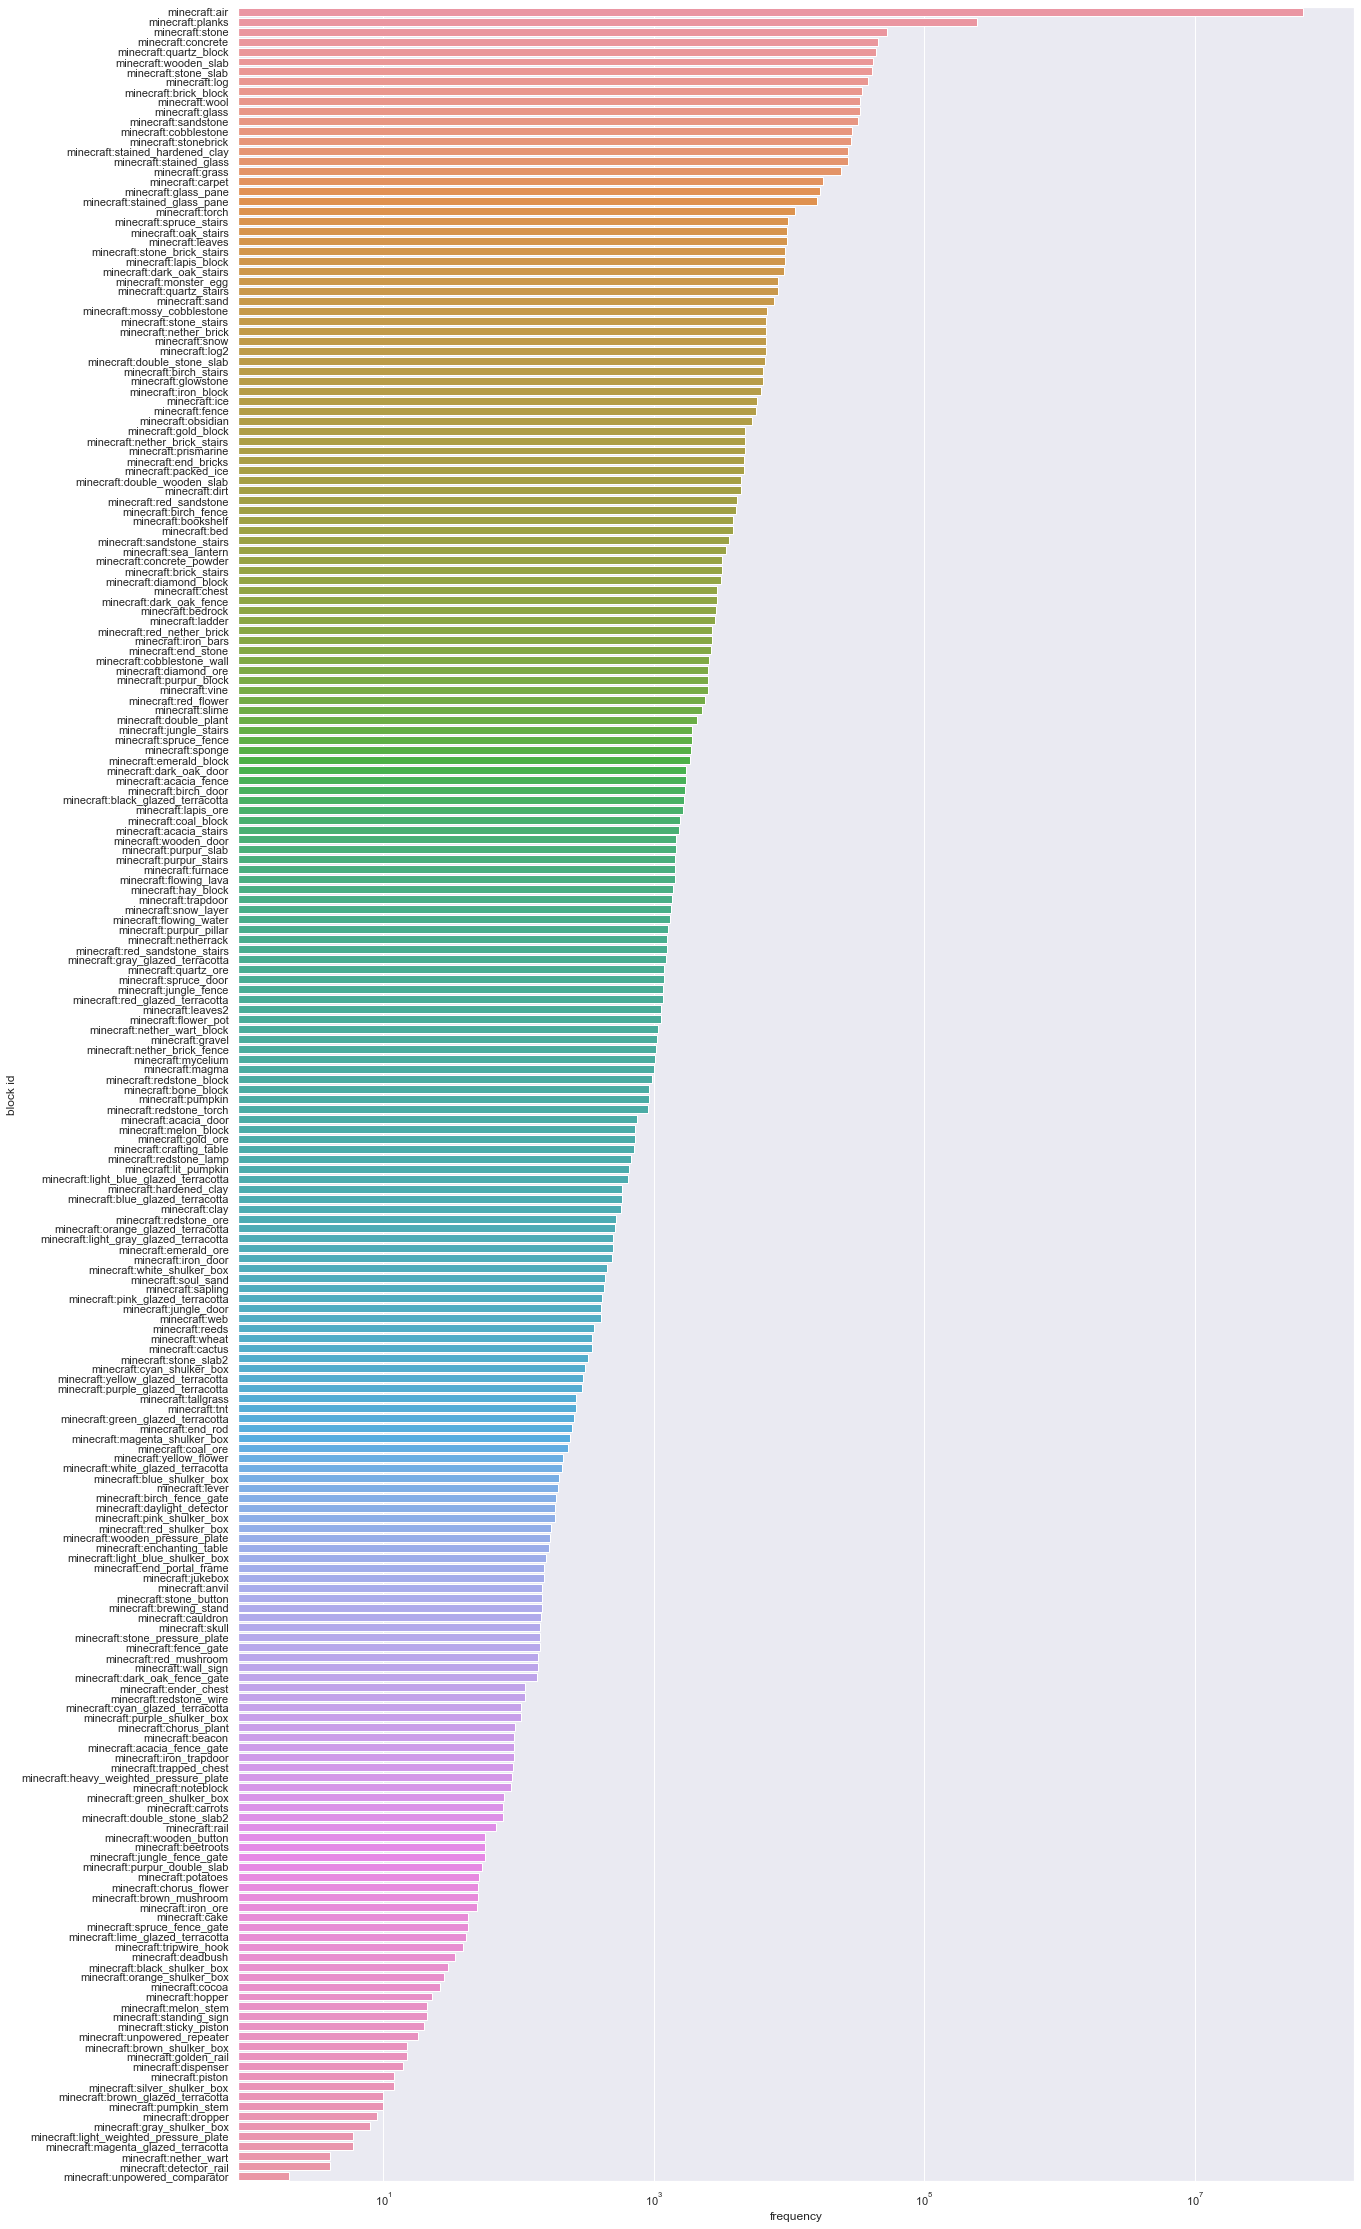

In [4]:
plt.figure(figsize=(20, 40))
ax = sns.barplot(x="frequency", y="block id", data=block_frequency_df,)
ax.set(xscale="log")
plt.show()

## Embedding

In [5]:
embeddings = np.load(LIST_OUTPUT_DIR + '/embeddings.npy')
with open(LIST_OUTPUT_DIR + '/block2idx.pkl', 'rb') as f:
	block2idx = dict(pickle.load(f))
with open(LIST_OUTPUT_DIR + '/idx2block.pkl', 'rb') as f:
	idx2block = dict(pickle.load(f))

In [6]:
pd.DataFrame(embeddings.transpose())

,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
0,-0.012346,-0.120208,0.213130,-0.240513,0.080872,0.238262,-0.469792,0.267479,-0.374458,0.030686,...,0.764748,0.538578,0.422581,0.313878,0.694796,0.064126,0.554622,-0.111033,0.090538,-0.018979
1,0.161002,0.082176,0.197206,1.060575,0.073273,0.399216,0.323087,1.118131,0.418864,0.191907,...,0.087282,-0.151738,0.032287,0.071663,-0.008860,0.173818,-0.136054,0.054113,0.059493,-0.162189
2,0.001406,-0.035523,-0.491981,0.103752,0.017028,0.095855,0.111145,-0.095462,-0.131351,-0.838642,...,0.384357,0.235399,0.603840,0.168033,-0.472438,0.014372,-0.503553,0.088100,0.462903,-0.356152
3,-0.142665,-0.059127,-0.151593,0.028471,-0.002507,0.022501,-0.562149,0.154692,-0.346861,0.363117,...,0.030129,0.201923,-0.055559,-0.002964,0.134297,-0.020387,-0.027287,0.408859,0.118264,-1.175362
4,0.194762,0.436531,1.192220,1.127752,0.684936,-0.265168,-0.102774,1.416523,0.168870,0.666438,...,0.085431,-0.021617,0.626306,0.315590,-0.383989,0.650355,0.071984,0.966717,0.151072,-0.045360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.155436,-0.526354,0.100300,0.060804,-0.665527,-0.258933,0.103557,-0.235270,-0.199015,-0.336480,...,-0.368349,-0.144558,-0.182702,-0.066993,-1.775182,0.306865,-0.080232,0.140843,0.068902,0.058622
60,-0.658808,0.163281,-0.514690,-0.236346,-0.533590,-0.186288,0.210102,-0.722354,-0.583616,-0.547702,...,-0.129958,-0.109160,-0.265532,-0.069957,-0.229716,0.372335,-0.663715,0.040843,0.032227,0.144872
61,0.020916,0.030618,-0.409779,0.095315,-0.050869,-0.151330,0.049969,-0.160957,0.025367,-0.839970,...,-0.053794,-0.156098,-0.232971,0.002229,-0.097670,-0.429940,-0.375044,-0.518262,-0.368013,-0.341803
62,0.321696,-0.138725,0.259679,-0.230570,-0.138436,0.014097,0.148673,-0.001161,0.112507,-0.128863,...,0.118552,0.343978,-0.055985,0.061549,-0.236609,0.294069,0.252593,-0.102959,0.075475,-0.062671


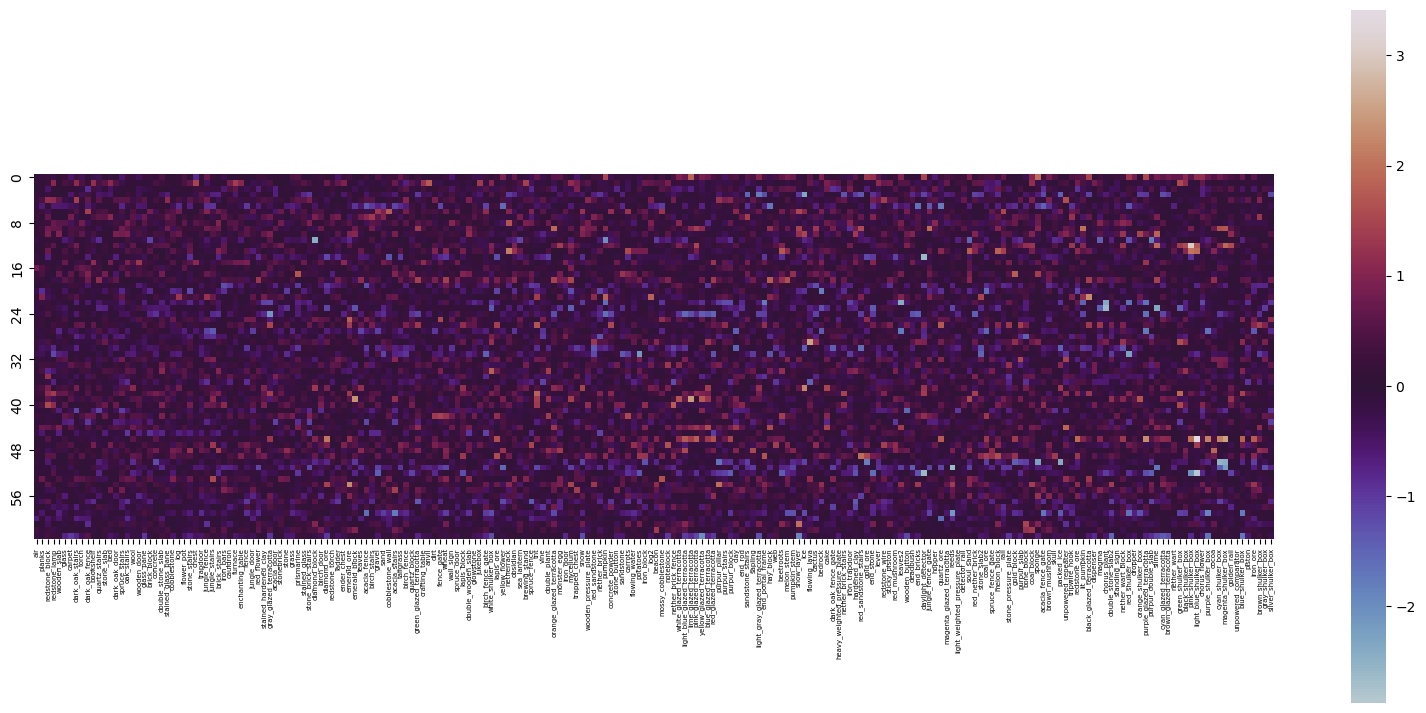

In [37]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(pd.DataFrame(embeddings.transpose()), annot=False, fmt="d", linewidths=0, ax=ax, square=True, xticklabels=list(block2idx.keys()), yticklabels=8, cmap='twilight', center=0)
xticklabels = [str.split(":")[1] for str in list(block2idx.keys())]
ax.set_xticklabels(xticklabels, fontsize=5)
plt.show()

## Embedding confusion matrix

In [8]:
from torch.nn import functional as F
from sklearn.metrics import ConfusionMatrixDisplay
import torch
from matplotlib import rcParams
from sklearn.metrics import mean_squared_error

In [9]:
names = []

confusion_matrix_dists = np.zeros((len(idx2block), len(idx2block)))
for i, b1 in idx2block.items():
    names.append(b1.split(":")[1])
    for j, b2 in idx2block.items():
        confusion_matrix_dists[i, j] = mean_squared_error(
            embeddings[i],
            embeddings[j],
        )

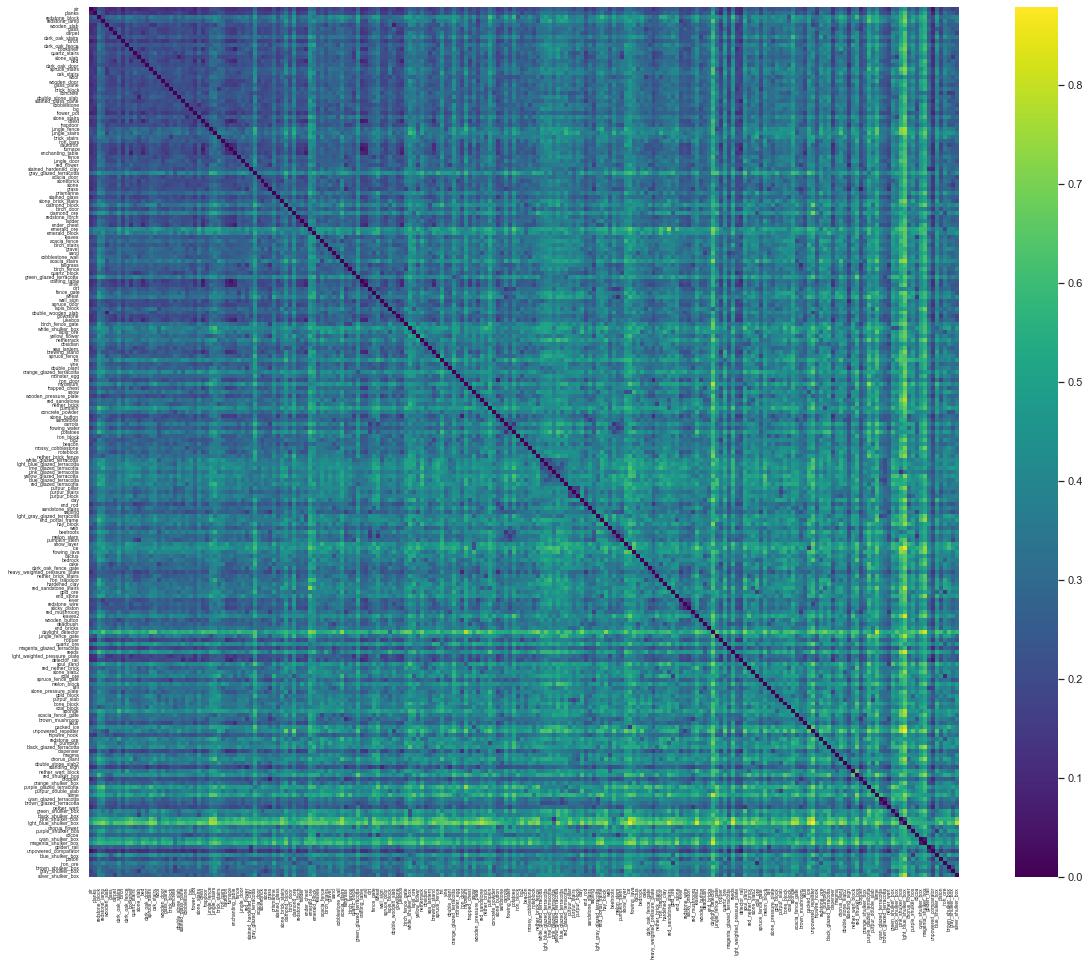

In [55]:
fig = plt.figure(figsize=(20, 16))
ax = sns.heatmap(confusion_matrix_dists, annot=False, square = True, cmap='viridis', xticklabels=names, yticklabels=names)
ax.set_xticklabels(names, fontsize=5)
ax.set_yticklabels(names, fontsize=5)
plt.show()

## Embedding 2D projection

In [143]:
# a copy
import pymde
import numpy as np
import torch
import math

In [57]:
embedding_2d_project = pymde.preserve_distances(torch.tensor(embeddings), embedding_dim=2).embed()
labels = [str.split(":")[1] for str in list(block2idx.keys())]

In [156]:
sizes = [math.log(block_frequency_dict["minecraft:" + label])*100 for label in labels]

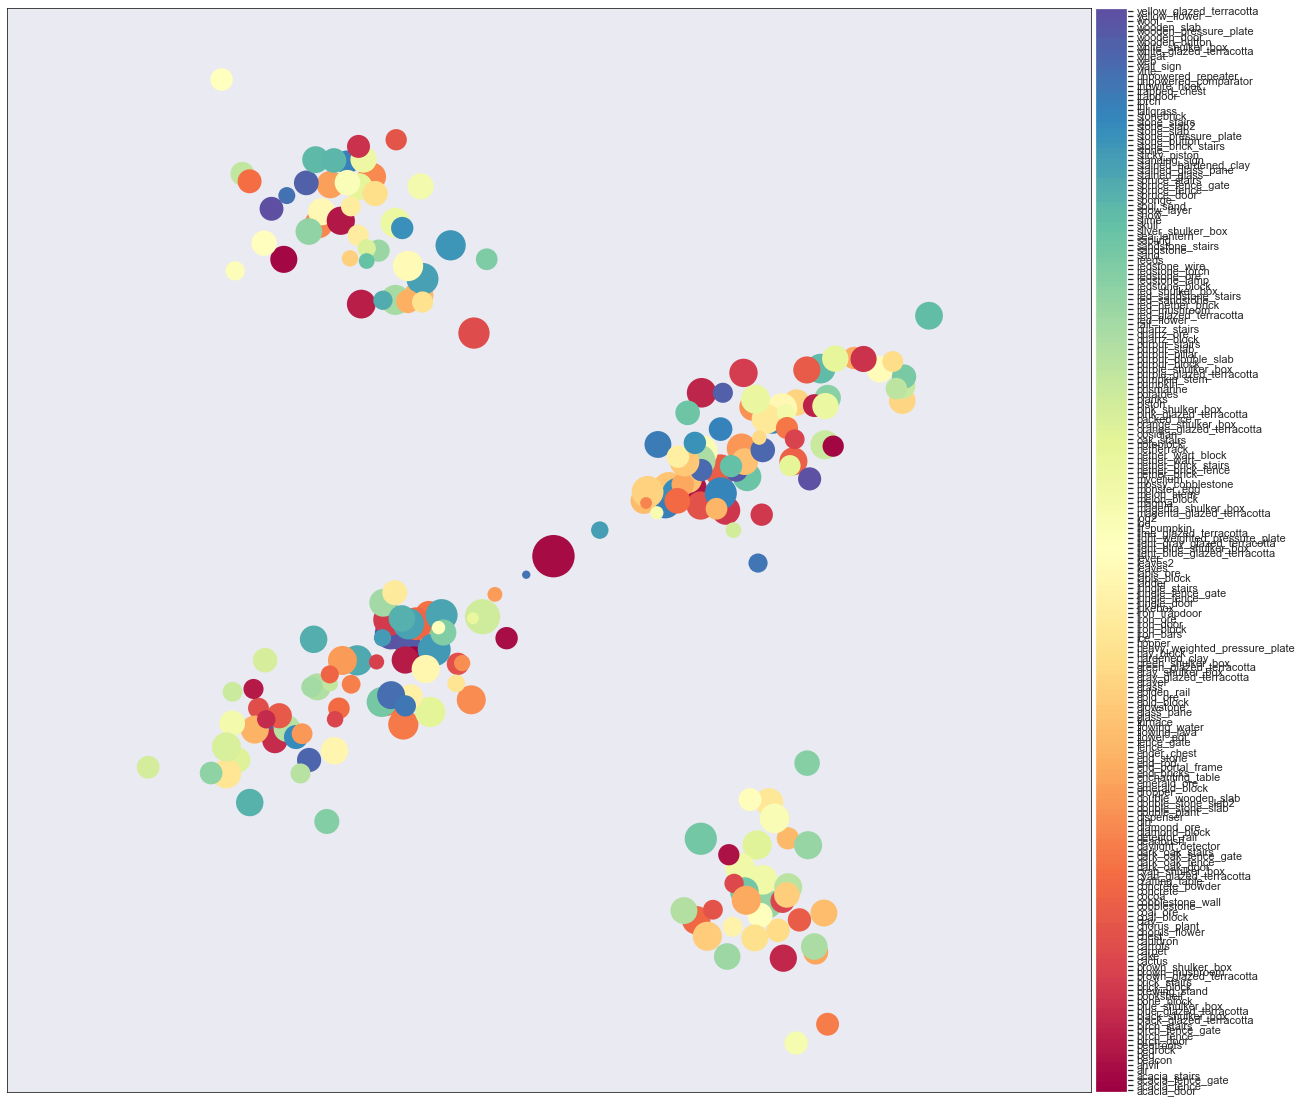

In [159]:
ax = pymde.plot(embedding_2d_project, marker_size=sizes, color_by=labels, figsize_inches=(16,16))
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Embedding 3D projection